no_dreamer_2
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_2_456
no_dreamer_5
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_56
dreamer_5
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_5_7
no_dreamer_2
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_2_56
no_dreamer_0
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_0_992
dreamer_2
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_58
dreamer_5
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_5_56
no_dreamer_5
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_5000
no_dreamer_5
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_992
no_dreamer_0
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_0_456
dreamer_2
/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_994
no_dreamer_5
/media/thatblueboy/Seagate/DOP/logs/W

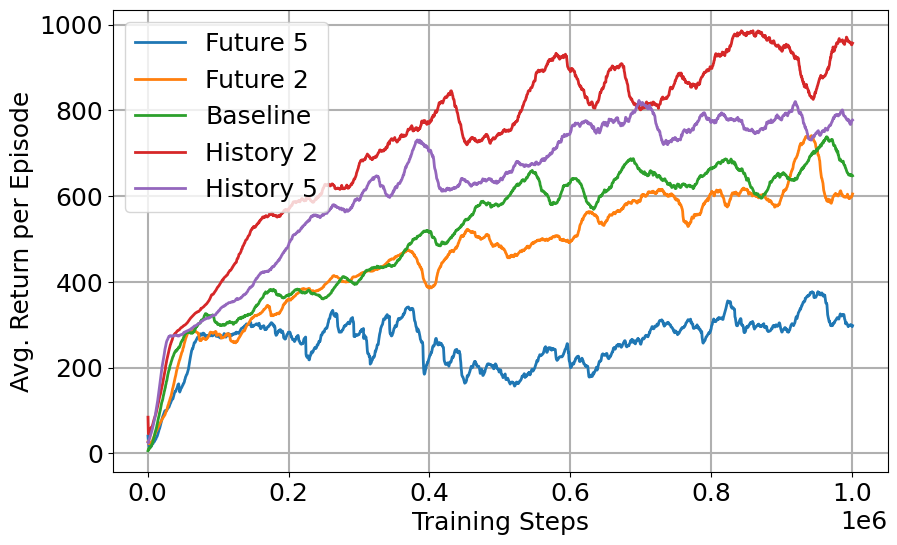

In [6]:
import os
import re
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define base directory
BASE_DIR = "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models"

# Define categories based on folder name prefixes
PREFIXES = ["dreamer_5", "dreamer_2", "no_dreamer_0", "no_dreamer_2", "no_dreamer_5"]
labels = ["Future 5", "Future 2", "Baseline", "History 2", "History 5"]

# Data storage
grouped_rewards = defaultdict(lambda: defaultdict(list))  # {prefix: {step: [values]}}

# Map the prefixes to the corresponding labels
prefix_to_label = {prefix: label for prefix, label in zip(PREFIXES, labels)}

# Iterate through each subfolder
for subfolder in os.listdir(BASE_DIR):
    subfolder_path = os.path.join(BASE_DIR, subfolder)

    # Match folders strictly with pattern "<prefix>_<number>"
    matching_prefix = next((p for p in PREFIXES if re.match(rf"^{p}_[0-9]+$", subfolder)), None)
    if not matching_prefix or not os.path.isdir(subfolder_path):
        continue
    print(matching_prefix)

    # Find TensorFlow event files
    for root, _, files in os.walk(subfolder_path):
        print(subfolder_path)
        for file in files:
            if file.startswith("events.out.tfevents"):
                event_file = os.path.join(root, file)

                # Extract `ep_rew_mean` values
                for event in tf.compat.v1.train.summary_iterator(event_file):
                    for value in event.summary.value:
                        if value.tag == "rollout/ep_rew_mean":
                            step = event.step  # Training step
                            grouped_rewards[matching_prefix][step].append(value.simple_value)

# Compute averaged rewards per step
averaged_rewards = {
    prefix: {step: np.mean(values) for step, values in sorted(steps.items())}
    for prefix, steps in grouped_rewards.items()
}

# Plot results
plt.figure(figsize=(10, 6))

# Ensure that the plotting is in the order of the prefixes
for prefix in PREFIXES:
    if prefix in averaged_rewards:  # Ensure the prefix has data
        step_data = averaged_rewards[prefix]
        steps = list(step_data.keys())
        mean_rewards = list(step_data.values())

        # Plot mean rewards without shaded std deviation
        plt.plot(steps, mean_rewards, label=prefix_to_label[prefix], linewidth=2)

# Plot customizations
plt.xlabel("Training Steps", fontsize=18)
plt.ylabel("Avg. Return per Episode", fontsize=18)
plt.legend(fontsize=18)
plt.grid(True, linewidth=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()


In [ ]:

event_files = [ ["/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_0_7/events.out.tfevents.1742062249.myvictus.65746.0",
                "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_0_56/events.out.tfevents.1742064482.myvictus.875778.0",
               "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_0_456/events.out.tfevents.1742066678.myvictus.1685809.0",
               "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_0_992/events.out.tfevents.1742068889.myvictus.2495804.0",
               "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_0_5000/events.out.tfevents.1742071153.myvictus.3305845.0"
               ],
           
               [
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_2_7/events.out.tfevents.1742073390.myvictus.4115850.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_2_56/events.out.tfevents.1742075732.myvictus.4116275.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_2_456/events.out.tfevents.1742078585.myvictus.4116749.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_2_992/events.out.tfevents.1742081436.myvictus.4117267.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_2_5000/events.out.tfevents.1742084175.myvictus.4117743.0"
               ],

               [
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_7/events.out.tfevents.1742086436.myvictus.4119469.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_56/events.out.tfevents.1742089053.myvictus.4120057.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_456/events.out.tfevents.1742091768.myvictus.4121855.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_992/events.out.tfevents.1742094634.myvictus.4122382.0",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/no_dreamer_5_5000/events.out.tfevents.1742097093.myvictus.4122803.0"
               ],

            #    [
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_7/events.out.tfevents.1742099992.myvictus.4123335.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_56/events.out.tfevents.1742103884.myvictus.4123999.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_456/events.out.tfevents.1742107682.myvictus.4124631.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_992/events.out.tfevents.1742111501.myvictus.4125307.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_5000/events.out.tfevents.1742115412.myvictus.4126004.1"
            #    ],

            #    [
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_8/events.out.tfevents.1744704274.myvictus.7255.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_57/events.out.tfevents.1744708821.myvictus.11781.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_5001/events.out.tfevents.1744713461.myvictus.15905.1",
            #    ],

               [
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_9/events.out.tfevents.1744717427.myvictus.19847.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_58/events.out.tfevents.1744721332.myvictus.24877.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_458/events.out.tfevents.1744793543.myvictus.4777.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_994/events.out.tfevents.1744797077.myvictus.8919.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_5002/events.out.tfevents.1744725040.myvictus.32450.1"
               ],
            #    [
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_10/events.out.tfevents.1744804580.myvictus.14555.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_59/events.out.tfevents.1744812350.myvictus.22646.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_459/events.out.tfevents.1744820154.myvictus.26968.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_995/events.out.tfevents.1744827360.myvictus.28621.1",
            #        "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_2_5003/events.out.tfevents.1744833821.myvictus.31062.1"
            #    ],
               [
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_5_7/events.out.tfevents.1741973846.myvictus.36603.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_5_56/events.out.tfevents.1741978498.myvictus.36797.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_5_456/events.out.tfevents.1741983592.myvictus.38379.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_5_992/events.out.tfevents.1741988447.myvictus.38542.1",
                   "/media/thatblueboy/Seagate/DOP/logs/Walker2d-v5_PPO/models/dreamer_5_5000/events.out.tfevents.1741992263.myvictus.38667.1"
               ],

]

labels = [
    "Baselines", "History 2", "History 5", "Future 2.1", 
    "Future 5"
]
# event_file = os.path.join(root, file)


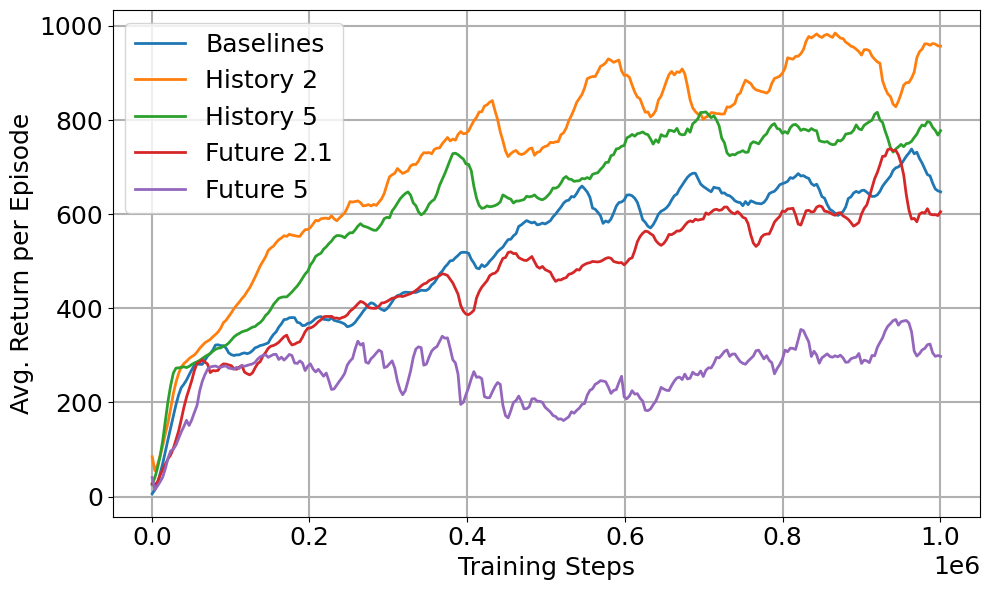

In [9]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_rewards(event_file):
    rewards = []
    steps = []
    for event in tf.compat.v1.train.summary_iterator(event_file):
        for value in event.summary.value:
            if value.tag == "rollout/ep_rew_mean":
                steps.append(event.step)
                rewards.append(value.simple_value)
    return np.array(steps), np.array(rewards)

def interpolate_rewards(common_steps, steps, rewards):
    return np.interp(common_steps, steps, rewards)

plt.figure(figsize=(10, 6))

for files, label in zip(event_files, labels):
    all_steps_rewards = []

    # Extract steps and rewards for each file
    for file in files:
        steps, rewards = extract_rewards(file)
        all_steps_rewards.append((steps, rewards))

    # Determine a common range of steps
    min_step = max(sr[0][0] for sr in all_steps_rewards)  # max of all first steps
    max_step = min(sr[0][-1] for sr in all_steps_rewards)  # min of all last steps
    common_steps = np.linspace(min_step, max_step, num=300)

    # Interpolate rewards to the common steps
    interpolated = np.array([
        interpolate_rewards(common_steps, steps, rewards)
        for steps, rewards in all_steps_rewards
    ])

    mean_rewards = np.mean(interpolated, axis=0)
    std_rewards = np.std(interpolated, axis=0)

    # Plot with shaded std
    plt.plot(common_steps, mean_rewards, label=label, linewidth=2)
    # plt.fill_between(common_steps, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2)

plt.xlabel("Training Steps", fontsize=18)
plt.ylabel("Avg. Return per Episode", fontsize=18)
plt.legend(fontsize=18)
plt.grid(True, linewidth=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()
